In [5]:
import pandas as pd

In [54]:
def get_merged_df(df1, df2, drop_col=None):
    merge = df1.merge(df2, how='left', left_index=True, right_index=True)
    if drop_col is not None:
        merge = merge.dropna(subset=[drop_col])
    if df1.index.name != df2.index.name: # we'll lose the index name if they don't match
        merge.index.name = df1.index.name  # add it back in!
    return merge

def set_rc(x=10,y=10, font_scale=1.):
    sns.set(rc={'figure.figsize':[x,y]}, font_scale=font_scale)

In [2]:
pd.read_csv('./20210427_manual_cm025_inference/20210427_manual_cm025_inference_using_profile_g2_g4_models__A320AX555-001;103338560;E9425289;CA209-025;0002;00199;Screening;05-14-2012;H&E;_1024757.csv')

,x,y,Unnamed: 0,Unnamed: 0.1,slide_id,full_path,class_0_model_prob,class_1_model_prob,model_id,dataset
0,64,32,5120,5120,A320AX555-001;103338560;E9425289;CA209-025;000...,/mnt/disks/manual_bms_tiles/20210426_tiles/A32...,0.091480,0.908520,profile_ccrcc_fold0_20210312,cm025
1,86,38,5121,5121,A320AX555-001;103338560;E9425289;CA209-025;000...,/mnt/disks/manual_bms_tiles/20210426_tiles/A32...,0.014877,0.985123,profile_ccrcc_fold0_20210312,cm025
2,68,68,5122,5122,A320AX555-001;103338560;E9425289;CA209-025;000...,/mnt/disks/manual_bms_tiles/20210426_tiles/A32...,0.001742,0.998258,profile_ccrcc_fold0_20210312,cm025
3,84,20,5123,5123,A320AX555-001;103338560;E9425289;CA209-025;000...,/mnt/disks/manual_bms_tiles/20210426_tiles/A32...,0.058314,0.941686,profile_ccrcc_fold0_20210312,cm025
4,82,59,5124,5124,A320AX555-001;103338560;E9425289;CA209-025;000...,/mnt/disks/manual_bms_tiles/20210426_tiles/A32...,0.036299,0.963701,profile_ccrcc_fold0_20210312,cm025
...,...,...,...,...,...,...,...,...,...,...
28560,11,18,10828,10828,A320AX555-001;103338560;E9425289;CA209-025;000...,/mnt/disks/manual_bms_tiles/20210426_tiles/A32...,0.771562,0.228438,tvnt,cm025
28561,19,51,10829,10829,A320AX555-001;103338560;E9425289;CA209-025;000...,/mnt/disks/manual_bms_tiles/20210426_tiles/A32...,0.761427,0.238573,tvnt,cm025
28562,43,70,10830,10830,A320AX555-001;103338560;E9425289;CA209-025;000...,/mnt/disks/manual_bms_tiles/20210426_tiles/A32...,0.402830,0.597170,tvnt,cm025
28563,42,43,10831,10831,A320AX555-001;103338560;E9425289;CA209-025;000...,/mnt/disks/manual_bms_tiles/20210426_tiles/A32...,0.034058,0.965942,tvnt,cm025


In [1]:
from glob import glob

In [3]:
len(glob('20210427_manual_cm025_inference/*csv'))

635

In [6]:
anno = pd.read_csv('/mnt/disks/manual_bms_tiles/manual_cm025_merged_braunsupp_annotations.csv')

In [8]:
inference_agg = pd.concat([pd.read_csv(path) for path in glob('20210427_manual_cm025_inference/*csv')])

In [9]:
inference_agg.shape

(12699735, 10)

In [ ]:
inference_agg.drop()

In [21]:
inference_agg.head(100000).pivot_table(index=['x','y','full_path',], columns='model_id',values='class_1_model_prob')

model_id                                                   profile_ccrcc_fold0_20210312  \
x   y  full_path                                                                          
6   36 /mnt/disks/manual_bms_tiles/20210426_tiles/A438...                      0.653101   
    37 /mnt/disks/manual_bms_tiles/20210426_tiles/A438...                      0.759187   
    40 /mnt/disks/manual_bms_tiles/20210426_tiles/A438...                      0.791066   
    42 /mnt/disks/manual_bms_tiles/20210426_tiles/A438...                      0.722887   
7   33 /mnt/disks/manual_bms_tiles/20210426_tiles/A438...                      0.454220   
...                                                                                 ...   
160 65 /mnt/disks/manual_bms_tiles/20210426_tiles/A414...                      0.594330   
161 63 /mnt/disks/manual_bms_tiles/20210426_tiles/A414...                      0.387777   
    64 /mnt/disks/manual_bms_tiles/20210426_tiles/A414...                      0.446549   
162 62 /mnt/disks/manual_bms_tiles/20210426_tiles/A414...                      0.493039   
    63 /mnt/disks/manual_bms_tiles/20210426_tiles/A414...                      0.417265   

model_id                                                   profile_ccrcc_fold1_20210312  \
x   y  full_path                                                                          
6   36 /mnt/disks/manual_bms_tiles/20210426_tiles/A438...                      0.393426   
    37 /mnt/disks/manual_bms_tiles/20210426_tiles/A438...                      0.705953   
    40 /mnt/disks/manual_bms_tiles/20210426_tiles/A438...                      0.547221   
    42 /mnt/disks/manual_bms_tiles/20210426_tiles/A438...                      0.520123   
7   33 /mnt/disks/manual_bms_tiles/20210426_tiles/A438...                      0.303174   
...                                                                                 ...   
160 65 /mnt/disks/manual_bms_tiles/20210426_tiles/A414...                      0.626543   
161 63 /mnt/disks/manual_bms_tiles/20210426_tiles/A414...                      0.585065   
    64 /mnt/disks/manual_bms_tiles/20210426_tiles/A414...                      0.387195   
162 62 /mnt/disks/manual_bms_tiles/20210426_tiles/A414...                      0.492464   
    63 /mnt/disks/manual_bms_tiles/20210426_tiles/A414...                      0.450390   

model_id                                                   profile_ccrcc_fold2_20210312  \
x   y  full_path                                                                          
6   36 /mnt/disks/manual_bms_tiles/20210426_tiles/A438...                      0.777615   
    37 /mnt/disks/manual_bms_tiles/20210426_tiles/A438...                      0.929529   
    40 /mnt/disks/manual_bms_tiles/20210426_tiles/A438...                      0.866607   
    42 /mnt/disks/manual_bms_tiles/20210426_tiles/A438...                      0.776022   
7   33 /mnt/disks/manual_bms_tiles/20210426_tiles/A438...                      0.397150   
...                                                                                 ...   
160 65 /mnt/disks/manual_bms_tiles/20210426_tiles/A414...                      0.503118   
161 63 /mnt/disks/manual_bms_tiles/20210426_tiles/A414...                      0.484893   
    64 /mnt/disks/manual_bms_tiles/20210426_tiles/A414...                      0.335527   
162 62 /mnt/disks/manual_bms_tiles/20210426_tiles/A414...                      0.461729   
    63 /mnt/disks/manual_bms_tiles/20210426_tiles/A414...                      0.504763   

model_id                                                   profile_ccrcc_fold3_20210312  \
x   y  full_path                                                                          
6   36 /mnt/disks/manual_bms_tiles/20210426_tiles/A438...                      0.341160   
    37 /mnt/disks/manual_bms_tiles/20210426_tiles/A438...                      0.824798   
    40 /mnt/disks/manual_bms_tiles/20210426_tiles/A438...                      0.792

In [22]:
[f'profile_ccrcc_fold{x}_20210312' for x in range(4)]

['profile_ccrcc_fold0_20210312',
 'profile_ccrcc_fold1_20210312',
 'profile_ccrcc_fold2_20210312',
 'profile_ccrcc_fold3_20210312']

In [25]:
inference_agg.head(100000).pivot_table(index=['x','y','full_path',], columns='model_id',values='class_1_model_prob')[[f'profile_ccrcc_fold{x}_20210312' for x in range(4)]].mean(1)

x    y   full_path                                                                                                                                               
6    36  /mnt/disks/manual_bms_tiles/20210426_tiles/A438AX000-001;103291340;AE070736;CA209-025;0023;00671;Screening;05-07-2012;H&E;_1027265_files/20.0/6_36.png      0.541326
     37  /mnt/disks/manual_bms_tiles/20210426_tiles/A438AX000-001;103291340;AE070736;CA209-025;0023;00671;Screening;05-07-2012;H&E;_1027265_files/20.0/6_37.png      0.804867
     40  /mnt/disks/manual_bms_tiles/20210426_tiles/A438AX000-001;103291340;AE070736;CA209-025;0023;00671;Screening;05-07-2012;H&E;_1027265_files/20.0/6_40.png      0.749285
     42  /mnt/disks/manual_bms_tiles/20210426_tiles/A438AX000-001;103291340;AE070736;CA209-025;0023;00671;Screening;05-07-2012;H&E;_1027265_files/20.0/6_42.png      0.672356
7    33  /mnt/disks/manual_bms_tiles/20210426_tiles/A438AX000-001;103291340;AE070736;CA209-025;0023;00671;Screening;05-07-2012;H&E;_1027265_fi

In [59]:
def get_ensemble_mean_pred_pivot(df, agg_cols=[f'profile_ccrcc_fold{x}_20210312' for x in range(4)]):
    temp = df.pivot_table(index=['x','y','full_path','slide_id'], columns='model_id',values='class_1_model_prob')
    temp['prob_g4_not_g2'] = temp[agg_cols].mean(1)
    temp = temp.rename(columns={'tvnt':'prob_tumor'})
    return temp.drop(columns=agg_cols)
    

In [49]:
get_ensemble_mean_pred_pivot(inference_agg.head(100000))

model_id                                                   prob_tumor  \
x   y  full_path                                                        
6   36 /mnt/disks/manual_bms_tiles/20210426_tiles/A438...    0.030174   
    37 /mnt/disks/manual_bms_tiles/20210426_tiles/A438...    0.074932   
    40 /mnt/disks/manual_bms_tiles/20210426_tiles/A438...    0.048858   
    42 /mnt/disks/manual_bms_tiles/20210426_tiles/A438...    0.167763   
7   33 /mnt/disks/manual_bms_tiles/20210426_tiles/A438...    0.164725   
...                                                               ...   
160 65 /mnt/disks/manual_bms_tiles/20210426_tiles/A414...    0.099367   
161 63 /mnt/disks/manual_bms_tiles/20210426_tiles/A414...    0.041402   
    64 /mnt/disks/manual_bms_tiles/20210426_tiles/A414...    0.050447   
162 62 /mnt/disks/manual_bms_tiles/20210426_tiles/A414...    0.065812   
    63 /mnt/disks/manual_bms_tiles/20210426_tiles/A414...    0.059448   

model_id                                                   prob_g4_not_g2  
x   y  full_path                                                           
6   36 /mnt/disks/manual_bms_tiles/20210426_tiles/A438...        0.541326  
    37 /mnt/disks/manual_bms_tiles/20210426_tiles/A438...        0.804867  
    40 /mnt/disks/manual_bms_tiles/20210426_tiles/A438...        0.749285  
    42 /mnt/disks/manual_bms_tiles/20210426_tiles/A438...        0.672356  
7   33 /mnt/disks/manual_bms_tiles/20210426_tiles/A438...        0.331003  
...                                                                   ...  
160 65 /mnt/disks/manual_bms_tiles/20210426_tiles/A414...        0.559477  
161 63 /mnt/disks/manual_bms_tiles/20210426_tiles/A414...        0.441778  
    64 /mnt/disks/manual_bms_tiles/20210426_tiles/A414...        0.361880  
162 62 /mnt/disks/manual_bms_tiles/20210426_tiles/A414...        0.410843  
    63 /mnt/disks/manual_bms_tiles/20210426_tiles/A414...        0.432201  

[20311 rows x 2 columns]

In [53]:
get_ensemble_mean_pred_pivot(inference_agg.head(100000))

model_id,x,y,prob_tumor,prob_g4_not_g2
full_path,,,,
/mnt/disks/manual_bms_tiles/20210426_tiles/A438AX000-001;103291340;AE070736;CA209-025;0023;00671;Screening;05-07-2012;H&E;_1027265_files/20.0/6_36.png,6,36,0.030174,0.541326
/mnt/disks/manual_bms_tiles/20210426_tiles/A438AX000-001;103291340;AE070736;CA209-025;0023;00671;Screening;05-07-2012;H&E;_1027265_files/20.0/6_37.png,6,37,0.074932,0.804867
/mnt/disks/manual_bms_tiles/20210426_tiles/A438AX000-001;103291340;AE070736;CA209-025;0023;00671;Screening;05-07-2012;H&E;_1027265_files/20.0/6_40.png,6,40,0.048858,0.749285
/mnt/disks/manual_bms_tiles/20210426_tiles/A438AX000-001;103291340;AE070736;CA209-025;0023;00671;Screening;05-07-2012;H&E;_1027265_files/20.0/6_42.png,6,42,0.167763,0.672356
/mnt/disks/manual_bms_tiles/20210426_tiles/A438AX000-001;103291340;AE070736;CA209-025;0023;00671;Screening;05-07-2012;H&E;_1027265_files/20.0/7_33.png,7,33,0.164725,0.331003
...,...,...,...,...
/mnt/disks/manual_bms_tiles/20210426_tiles/A414AX335-001;103343449;E9106977;CA209-025;0056;00791;Screening;08-22-2013;H&E;_1027854_files/20.0/160_65.png,160,65,0.099367,0.559477
/mnt/disks/manual_bms_tiles/20210426_tiles/A414AX335-001;103343449;E9106977;CA209-025;0056;00791;Screening;08-22-2013;H&E;_1027854_files/20.0/161_63.png,161,63,0.041402,0.441778
/mnt/disks/manual_bms_tiles/20210426_tiles/A414AX335-001;103343449;E9106977;CA209-025;0056;00791;Screening;08-22-2013;H&E;_1027854_files/20.0/161_64.png,161,64,0.050447,0.361880


,subjid
slide_id,
A635AX787-001;103291254;AF439754;CA209-025;0001;01071;Screening;01-17-2013;H&E;_1028865,1071
A320AX555-001;103338560;E9425289;CA209-025;0002;00199;Screening;05-14-2012;H&E;_1024757,199
A278AX851-001;103387009;AD096272;CA209-025;0001;00110;Screening;01-19-2004;H&E;_1024241,110
A598AX309-001;103291246;AD498721;CA209-025;0018;00629;Screening;01-11-2008;H&E;_1027564,629
A415AX249-001;103382843;L1381856;CA209-025;0121;00540;Screening;06-08-2006;H&E;_1026951,540
...,...
A562AX394-001;103354992;E9720041;CA209-025;0111;00304;Screening;11-22-2004;H&E;_1024993,304
A642AX236-001;103267077;E9786643;CA209-025;0131;00939;Screening;09-23-2013;H&E;_1028606,939
A317AX678-001;103216132;E9106394;CA209-025;0073;00645;Screening;08-13-2013;H&E;_1027194,645


In [62]:
reduced_agg = pd.DataFrame()
for path in glob('20210427_manual_cm025_inference/*csv'):
    df = pd.read_csv(path)
    reduced_df = get_ensemble_mean_pred_pivot(df).reset_index().set_index('slide_id')
    reduced_df = get_merged_df(reduced_df, anno.set_index('slide_id')[['subjid']])
    reduced_agg = pd.concat([reduced_agg, reduced_df])
    

In [63]:
reduced_agg.shape

(2539947, 6)

In [64]:
reduced_agg

,x,y,full_path,prob_tumor,prob_g4_not_g2,subjid
slide_id,,,,,,
A277AX894-001;103242662;E9123053;CA209-025;0114;00056;Screening;08-24-2009;H&E;_1024113,19,31,/mnt/disks/manual_bms_tiles/20210426_tiles/A27...,0.075454,0.870242,56
A277AX894-001;103242662;E9123053;CA209-025;0114;00056;Screening;08-24-2009;H&E;_1024113,20,30,/mnt/disks/manual_bms_tiles/20210426_tiles/A27...,0.263009,0.564676,56
A277AX894-001;103242662;E9123053;CA209-025;0114;00056;Screening;08-24-2009;H&E;_1024113,20,31,/mnt/disks/manual_bms_tiles/20210426_tiles/A27...,0.082765,0.508442,56
A277AX894-001;103242662;E9123053;CA209-025;0114;00056;Screening;08-24-2009;H&E;_1024113,20,32,/mnt/disks/manual_bms_tiles/20210426_tiles/A27...,0.176130,0.781669,56
A277AX894-001;103242662;E9123053;CA209-025;0114;00056;Screening;08-24-2009;H&E;_1024113,20,33,/mnt/disks/manual_bms_tiles/20210426_tiles/A27...,0.038044,0.728091,56
...,...,...,...,...,...,...
A267AX547-001;103402706;EA012706;CA209-025;0062;00602;Screening;11-29-2004;H&E;_1027093,108,35,/mnt/disks/manual_bms_tiles/20210426_tiles/A26...,0.197644,0.519704,602
A267AX547-001;103402706;EA012706;CA209-025;0062;00602;Screening;11-29-2004;H&E;_1027093,108,36,/mnt/disks/manual_bms_tiles/20210426_tiles/A26...,0.154503,0.591646,602
A267AX547-001;103402706;EA012706;CA209-025;0062;00602;Screening;11-29-2004;H&E;_1027093,108,37,/mnt/disks/manual_bms_tiles/20210426_tiles/A26...,0.374225,0.837474,602


<AxesSubplot:>

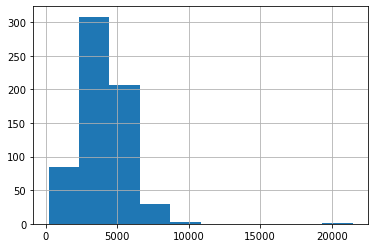

In [66]:
reduced_agg.subjid.value_counts().hist()

<AxesSubplot:>

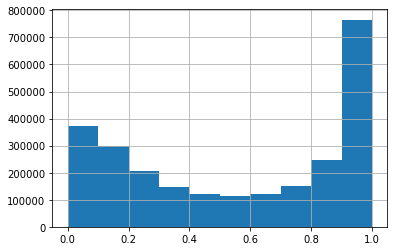

In [67]:
reduced_agg.prob_tumor.hist()

In [68]:
reduced_agg.prob_tumor.describe()

count    2.539947e+06
mean     5.594179e-01
std      3.606911e-01
min      2.115187e-06
25%      1.871910e-01
50%      6.117883e-01
75%      9.317084e-01
max      9.999487e-01
Name: prob_tumor, dtype: float64

<AxesSubplot:>

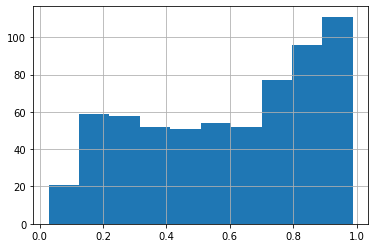

In [73]:
reduced_agg.groupby('subjid').prob_tumor.median().hist()

<AxesSubplot:>

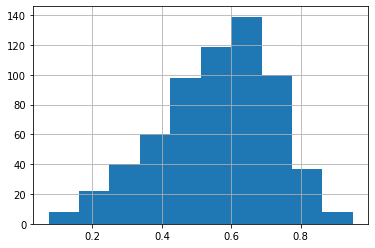

In [74]:
reduced_agg.groupby('subjid').prob_tumor.mean().hist()

In [75]:
(reduced_agg.prob_tumor > 0.5).mean()

0.5496307600119215

In [76]:
(reduced_agg.prob_tumor > 0.7).mean()

0.45802097445340395

In [77]:
inference_agg.to_pickle('20210427_tvnt_and_g2_g4_inference_profile_ccrcc_training_manual_cm025_tiles_INFERENCE_AGG_ALL_MODELS.pkl')
reduced_agg.to_pickle('20210427_tvnt_and_g2_g4_inference_profile_ccrcc_training_manual_cm025_tiles_INFERENCE_AGG_ENSEMBLEMEAN.pkl')